In [18]:
%matplotlib widget

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy as np

In [20]:
plt.style.use("ggplot")

In [21]:
# Create: User Parameters
# path_results = "/Users/june/Documents/results/lightning/lightning_logs/version_7/

path_root = "/Users/june/Documents/results/RNNvsLSTM/dens_CNN_LSTM/lightning_logs"

path_list = []
for i, ele in enumerate(os.listdir(path_root)):
    #if "version" in ele:
    #if ele in ["version_%s" % j for j in all_versions]:
    #    path_list.append(os.path.join(path_root, ele, "metrics.csv"))
    path_list.append(os.path.join(path_root, ele, "metrics.csv"))

path_list

['/Users/june/Documents/results/RNNvsLSTM/dens_CNN_LSTM/lightning_logs/version_0/metrics.csv']

In [22]:
path_list

['/Users/june/Documents/results/RNNvsLSTM/dens_CNN_LSTM/lightning_logs/version_0/metrics.csv']

In [23]:
def load_data(path):
    
    return pd.read_csv(path)

In [24]:
data = load_data(path_list[0])

len(data)

In [25]:
data['train_error_epoch'].unique()

KeyError: 'train_error_epoch'

In [26]:
data

,epoch,lr-Adam,step,train_loss_epoch,train_loss_step,valid_MAE_epoch,valid_MAE_step,valid_MSE_epoch,valid_MSE_step,valid_emd_epoch,valid_emd_step,valid_loss_epoch,valid_loss_step
0,NaN,0.005,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,0,NaN,0.774235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,1,NaN,0.685492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,2,NaN,0.600523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,3,NaN,0.510450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,1.0,NaN,52,NaN,0.079644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,1.0,NaN,53,NaN,0.077576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,NaN,NaN,7,NaN,NaN,NaN,0.198895,NaN,0.071289,NaN,0.014835,NaN,0.071289
66,NaN,NaN,8,NaN,NaN,NaN,0.206973,NaN,0.075583,NaN,0.018199,NaN,0.075583


In [27]:
print("\n------ Column Names ------\n")
for ele in data.columns:
    
    print(ele)


------ Column Names ------

epoch
lr-Adam
step
train_loss_epoch
train_loss_step
valid_MAE_epoch
valid_MAE_step
valid_MSE_epoch
valid_MSE_step
valid_emd_epoch
valid_emd_step
valid_loss_epoch
valid_loss_step


In [28]:
def plot_data(x_vals, y_vals, title, 
              x_label, y_label, y_lim=None, 
              fig_size=(10, 5), font_size=14):

    fig, ax = plt.subplots(figsize=fig_size)

    ax.plot(x_vals, y_vals, linewidth=5)

    ax.set_title("%s" % title)
    ax.set_xlabel("%s" % x_label)
    ax.set_ylabel("%s" % y_label)

    if y_lim is not None:
        ax.set_ylim(y_lim)

    fig.tight_layout()

/var/folders/xs/5688kgc54c12jm1b6pjmrldr0000gn/T/ipykernel_5401/965252823.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


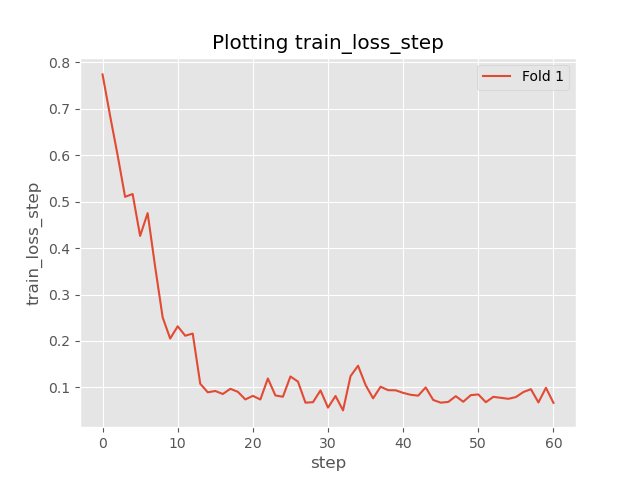

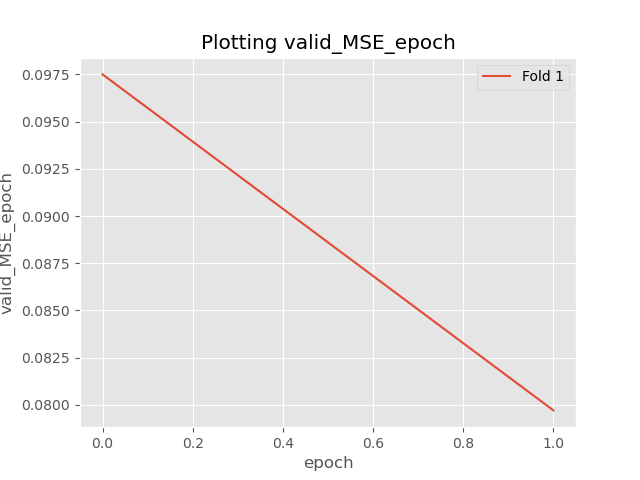

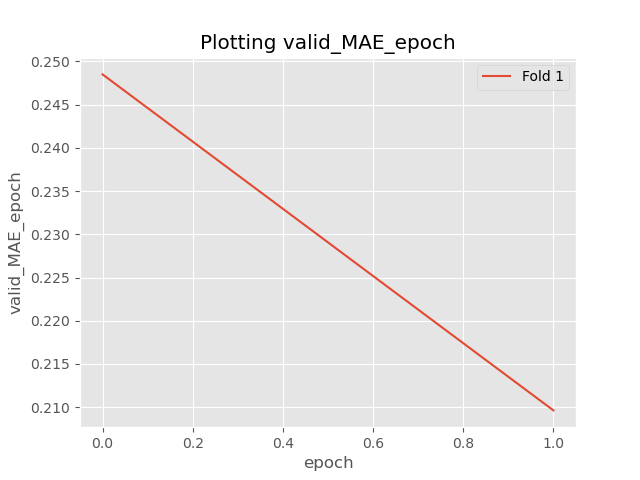

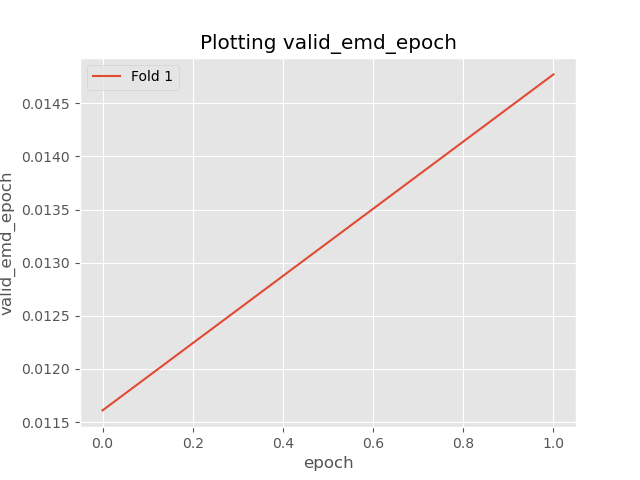

In [31]:
target_names = ["train_loss_step", "valid_MSE_epoch", "valid_MAE_epoch", "valid_emd_epoch"]

all_data = {name: [] for name in target_names}

for fold_idx, fold in enumerate(path_list):
    data = load_data(fold)
    for name in target_names:
        df = data.dropna(subset=[name])
        
        if "lr" in name:
            tag = "epoch"
            x_vals = list(range(df.shape[0]))
        else:
            tag = name.split("_")[-1]
            x_vals = df[tag]
        
        y_vals = df[name]
        
        all_data[name].append((x_vals, y_vals, f"Fold {fold_idx+1}"))

# Plot data from all folds for each target name
for name in target_names:
    plt.figure()
    plt.title("Plotting %s" % name)
    plt.xlabel("%s" % ("epoch" if "lr" in name else name.split("_")[-1]))
    plt.ylabel("%s" % name)
    y_lim = (-0.005, 1.05) if "accuracy" in name else None
    for fold_data in all_data[name]:
        x_vals, y_vals, label = fold_data
        plt.plot(x_vals, y_vals, label=label)
    plt.legend()
    plt.show()

In [80]:
data.columns

Index(['lr-SGD', 'step', 'train_error_step', 'epoch', 'accuracy_step',
       'recall_step', 'valid_error_step', 'f1_step', 'precision_step',
       'accuracy_epoch', 'valid_error_epoch', 'f1_epoch', 'recall_epoch',
       'precision_epoch', 'train_error_epoch'],
      dtype='object')

In [81]:
data["epoch"].max()

99.0

In [82]:
path_list

['/Users/june/Documents/results/NNclass/lightning_logs/version_2/metrics.csv',
 '/Users/june/Documents/results/NNclass/lightning_logs/version_3/metrics.csv']

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (5).

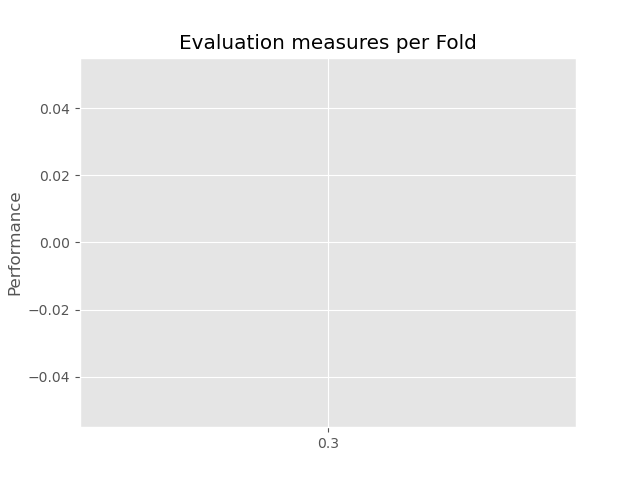

In [14]:
target_names = ["f1", "recall", "accuracy", "precision"]
results = []
x_vals = ("Fold1", "Fold2", "Fold3", "Fold4", "Fold5")

for fold in path_list:
    data = load_data(fold)
    metric_sums = {metric: 0 for metric in target_names}

    for metric in target_names:
        if f"{metric}_epoch" in data.columns:
            metric_sums[metric] += data[f"{metric}_epoch"].sum()
    
    averages = {metric: metric_sums[metric] / data["epoch"].max() for metric in target_names}
    results.append(averages)

x = np.arange(len(path_list))

fig, ax = plt.subplots()

width = 0.2
for i, metric in enumerate(target_names):
    metric_values = [result[metric] for result in results]
    rects = ax.bar(x + i * width, metric_values, width=width, label=metric)

ax.set_ylabel('Performance')
ax.set_title('Evaluation measures per Fold')
ax.set_xticks(x + 1.5 * width) 
ax.set_xticklabels(x_vals)
ax.legend(loc='upper left', bbox_to_anchor=(0.75, 1))

plt.show()

In [89]:
data['accuracy_epoch'].unique()

array([       nan, 0.45833334, 0.77500004, 1.        ])